<a href="https://colab.research.google.com/github/DeboraOliver/MachineLearning_lessons/blob/main/BestML_RegressionModel.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install -q yfinance

In [ ]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
#if you get an error after executing the code, try adding below. pd.core.common.is_list_like = pd.api.types.is_list_like
import pandas_datareader as pdr
import datetime
import yfinance as yf
import requests
import json

from functools import reduce
import plotly.express as px
import plotly.graph_objects as go
import seaborn as sns

In [ ]:
start = datetime.datetime(2010, 1, 1)
# end = datetime.datetime(2022, 5, 10)
end = datetime.date.today()

SP500 = pdr.DataReader(['sp500'], 'fred', start, end)
SP500 = pd.DataFrame(SP500).reset_index()
SP500

In [ ]:
vix = pdr.DataReader('VIXCLS', 'fred',start, end).dropna().squeeze()
vix = pd.DataFrame(vix).reset_index()
vix

In [ ]:
# acoes = ['PETR3.SA','AMER3.SA','GOLL4.SA', 'CVCB3.SA', 'WEGE3.SA', 'MGLU3.SA', 'TOTS3.SA', 'BOVA11.SA']
acoes = ['TOTS3.SA',"^BVSP", "USDBRL=x","CL=F"]

acoes_df = pd.DataFrame()
for acao in acoes:
  #acoes_df[acao] = data.DataReader(acao, data_source='yahoo', start='2015-01-01')['Close']
  acoes_df[acao] = yf.download(acao, start=start)['Close']

acao_bovespa = acoes_df.reset_index().rename(columns={'Date': 'DATE','^BVSP':'bovespa','USDBRL=x':'dolar','CL=F':'bpetroleo'})
acao_bovespa

In [ ]:

df = reduce(lambda x,y: pd.merge(x,y, on='DATE', how='left'), [acao_bovespa, vix, SP500])
df= df.rename(columns={'VIXCLS': 'vix'})
df=df.dropna(axis=0).reset_index().drop('index',axis=1)
# df.isnull().sum()
df.tail()

In [ ]:
figura = plt.figure(figsize=(20,10))
sns.heatmap(df.corr(), annot=True);

In [ ]:
acoes_df_normalizado = df.copy()
for i in acoes_df_normalizado.columns[1:]:
  acoes_df_normalizado[i] = acoes_df_normalizado[i] / acoes_df_normalizado[i][0]

figura = px.line(title = 'Histórico do preço das ações - normalizado')
for i in acoes_df_normalizado.columns[1:]:
  figura.add_scatter(x = acoes_df_normalizado['DATE'], y = acoes_df_normalizado[i], name = i)
figura.show()

In [ ]:
df.head()

# Regressão linear Simples

In [ ]:
df.sample()

In [ ]:
#previsor
X_previsor = df.iloc[:,5:6].values
X_previsor

In [ ]:
#o que eu quero prever: o valor da ação
y_objetivo = df.iloc[:,1].values
y_objetivo

In [ ]:
from sklearn.model_selection import train_test_split
X_previsor_treinamento, X_previsor_teste, y_objetivo_treinamento, y_objetivo_teste = train_test_split(X_previsor, y_objetivo, test_size = 0.3, random_state = 0)
#deixamos 70% para treinamento e 30% para testes
#random state = 0 para que sempre seja a msm divisão com os msm registros
X_previsor_treinamento.shape, y_objetivo_treinamento.shape

In [ ]:
#teste
X_previsor_teste.shape, y_objetivo_teste.shape

In [ ]:
from sklearn.linear_model import LinearRegression
regressor_simples_acao = LinearRegression()
regressor_simples_acao.fit(X_previsor_treinamento, y_objetivo_treinamento)

In [ ]:
# b0 e # b1 a formula é y = b0 +b1*x1 onde b0 é uma constante e b1 um coeficiente
regressor_simples_acao.intercept_ ,regressor_simples_acao.coef_

In [ ]:
#score que mede o desempenho deste algoritmo, queremos valores próximos de 1
regressor_simples_acao.score(X_previsor_treinamento, y_objetivo_treinamento)

In [ ]:
#na base de teste
#score que mede o desempenho deste algoritmo, queremos valores próximos de 1
regressor_simples_acao.score(X_previsor_teste, y_objetivo_teste)

In [ ]:
previsoes = regressor_simples_acao.predict(X_previsor_treinamento)
previsoes

In [ ]:
grafico1 = px.scatter(x = X_previsor_treinamento.ravel(), y = y_objetivo_treinamento)
grafico2 = px.line(x = X_previsor_treinamento.ravel(), y = previsoes)
grafico2.data[0].line.color = 'red'
grafico3 = go.Figure(data=grafico1.data + grafico2.data)
grafico3

## MAE = 5.792954031236629

mean absolute erros = diferenças absolutas entre as previsões e os valores reais

In [ ]:
# as previsões que ele encontrou
previsoes_teste = regressor_simples_acao.predict(X_previsor_teste)
print(previsoes_teste[0:5]) #valores previstos
print(y_objetivo_teste[0:5]) #valores reais

In [ ]:
from sklearn.metrics import mean_absolute_error, mean_squared_error
mean_absolute_error(y_objetivo_teste, previsoes_teste)

# Regressão linear Multipla

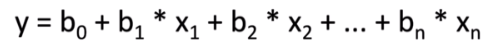

In [ ]:
#o que eu quero prever: o valor da ação
y_objetivo = df.iloc[:,1].values
#previsor
X_previsor = df.iloc[:,2:7].values
X_previsor

In [ ]:
from sklearn.model_selection import train_test_split
X_previsor_treinamento, X_previsor_teste, y_objetivo_treinamento, y_objetivo_teste = train_test_split(X_previsor, y_objetivo, test_size = 0.3, random_state = 0)
#deixamos 70% para treinamento e 30% para testes
#random state = 0 para que sempre seja a msm divisão com os msm registros
X_previsor_treinamento.shape, y_objetivo_treinamento.shape

In [ ]:
#teste
X_previsor_teste.shape, y_objetivo_teste.shape

In [ ]:
regressor_multiplo_acao = LinearRegression()
regressor_multiplo_acao.fit(X_previsor_treinamento, y_objetivo_treinamento)

In [ ]:
# b0 e # b1 a formula é y = b0 +b1*x1 onde b0 é uma constante e b1 um coeficiente
regressor_multiplo_acao.intercept_ ,len(regressor_multiplo_acao.coef_)

In [ ]:
#score que mede o desempenho deste algoritmo, queremos valores próximos de 1
regressor_multiplo_acao.score(X_previsor_treinamento, y_objetivo_treinamento)

In [ ]:
#na base de teste
#score que mede o desempenho deste algoritmo, queremos valores próximos de 1
regressor_multiplo_acao.score(X_previsor_teste, y_objetivo_teste)

In [ ]:
previsoes = regressor_multiplo_acao.predict(X_previsor_treinamento)
previsoes

## MAE = 2.0900787508269647

mean absolute erros = diferenças absolutas entre as previsões e os valores reais

In [ ]:
# as previsões que ele encontrou
previsoes_teste = regressor_multiplo_acao.predict(X_previsor_teste)
print(previsoes_teste[0:5]) #valores previstos
print(y_objetivo_teste[0:5]) #valores reais

In [ ]:
from sklearn.metrics import mean_absolute_error, mean_squared_error
mean_absolute_error(y_objetivo_teste, previsoes_teste)

# Regressão Polinomial

In [ ]:
from sklearn.preprocessing import PolynomialFeatures
poly = PolynomialFeatures(degree = 2)
X_previsor_treinamento_poly = poly.fit_transform(X_previsor_treinamento)
X_previsor_teste_poly = poly.transform(X_previsor_teste)

X_previsor_treinamento_poly.shape, X_previsor_teste_poly.shape

In [ ]:
regressor_acoes_poly = LinearRegression()
regressor_acoes_poly.fit(X_previsor_treinamento_poly, y_objetivo_treinamento)
print("Score de treinamento ", regressor_acoes_poly.score(X_previsor_treinamento_poly, y_objetivo_treinamento))
print("Score de teste ", regressor_acoes_poly.score(X_previsor_teste_poly, y_objetivo_teste))

In [ ]:
previsoes = regressor_acoes_poly.predict(X_previsor_teste_poly)
previsoes[0:5]

In [ ]:
y_objetivo_teste[0:5]

## MAE = 0.8701108586976378

In [ ]:
mean_absolute_error(y_objetivo_teste, previsoes)

# Árvore de Decisão

In [ ]:
from sklearn.tree import DecisionTreeRegressor
regressor_arvore_acoes = DecisionTreeRegressor()
regressor_arvore_acoes.fit(X_previsor_treinamento, y_objetivo_treinamento)

print("Score de treinamento ", regressor_arvore_acoes.score(X_previsor_treinamento, y_objetivo_treinamento))
print("Score de teste ", regressor_arvore_acoes.score(X_previsor_teste, y_objetivo_teste))

In [ ]:
previsoes = regressor_arvore_acoes.predict(X_previsor_teste)
previsoes[0:10]

In [ ]:
y_objetivo_teste[0:5]

## MAE = 0.3616696256800448

In [ ]:
from sklearn.metrics import mean_absolute_error
mean_absolute_error(y_objetivo_teste, previsoes)

# Random Forest

In [ ]:
from sklearn.ensemble import RandomForestRegressor
# regressor_random_forest_saude = RandomForestRegressor(n_estimators = 10)
regressor_random_forest_acoes = RandomForestRegressor(n_estimators=500)
regressor_random_forest_acoes.fit(X_previsor_treinamento, y_objetivo_treinamento)

print("Score de treinamento ", regressor_random_forest_acoes.score(X_previsor_treinamento, y_objetivo_treinamento))
print("Score de teste ", regressor_random_forest_acoes.score(X_previsor_teste, y_objetivo_teste))

In [ ]:
previsoes = regressor_random_forest_acoes.predict(X_previsor_teste)
previsoes[0:5]

In [ ]:
y_objetivo_teste[0:5]

In [ ]:
plt.plot(y_objetivo_teste, label='Expected')
plt.plot(previsoes, label='Predicted')
plt.legend()
plt.show()

## MAE = 0.311468220050894

In [ ]:
from sklearn.metrics import mean_absolute_error
mean_absolute_error(y_objetivo_teste, previsoes)

# Feature Importance

In [ ]:
# Calculate feature importance and store in pandas series
feature_imp = pd.Series(regressor_random_forest_acoes.feature_importances_, index=df.iloc[:,2:7].columns).sort_values(ascending=False)
feature_imp

# Redes Neurais

In [ ]:
from sklearn.preprocessing import StandardScaler
scaler_x = StandardScaler()
X_previsor_scaled = scaler_x.fit_transform(X_previsor)
scaler_y = StandardScaler()
y_objetivo_scaled = scaler_y.fit_transform(y_objetivo.reshape(-1,1))

In [ ]:
from sklearn.neural_network import MLPRegressor
regressor_rna_saude = MLPRegressor(max_iter=1000)
regressor_rna_saude.fit(X_previsor_scaled, y_objetivo_scaled.ravel())

In [ ]:
print("Score",regressor_rna_saude.score(X_previsor_scaled, y_objetivo_scaled))